# Introduction

This project will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:

+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?

**Data Sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


## Import Python Modules

Python modules that will be used in this project:


In [3]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## Loading the Data

**all_data.csv** will be read into a DataFrame called `df`. Using `head()` to check its contents

In [4]:
df = pd.read_csv("all_data.csv")
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


Lets check the shape of `df`. There are 96 rows and 4 columns

In [5]:
df.shape

(96, 4)

## Explore the Data.

Who are the six nations that are represented in `df`? 

There seems to be six countries reprsented in the data:
+ Chile
+ China
+ Germany
+ Mexico
+ United States of America (USA)
+ Zimbabwe

In [6]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


The next step is to find out which years are represented in `df`.

They are 2000-2015

In [7]:
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


#### Column Names

There seems to be some inconsistencies with the column names. All the columns except the third are one word in length. The third column `Life expectancy at birth (years)` is descriptive, but will prove challenging to wrangle when we come to coding the plot(s) itself. This tidy this up.

In [8]:
df = df.rename({"Life expectancy at birth (years)": "LEABY"}, axis = 'columns')
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


#### Exploratory Data Anaylsis (EDA) using Plots

Exploring the data through visualization can sometimes be more effective and paint a clearer picture.

Lets start with 'GDP', which is shown below. We can see that the distribution of `GDP` is very right-skewed as most of the values are on the left-hand side of the plot. We could describe this as a **power law distrubition**.

<br>


*In statistics, a power law is a functional relationship between two quantities, where a relative change in one quantity results in a relative change in the other quantity proportional to a power of the change, independent of the initial size of those quantities: one quantity varies as a power of another. For instance, considering the area of a square in terms of the length of its side, if the length is doubled, the area is multiplied by a factor of four.*

<Figure size 1000x800 with 0 Axes>

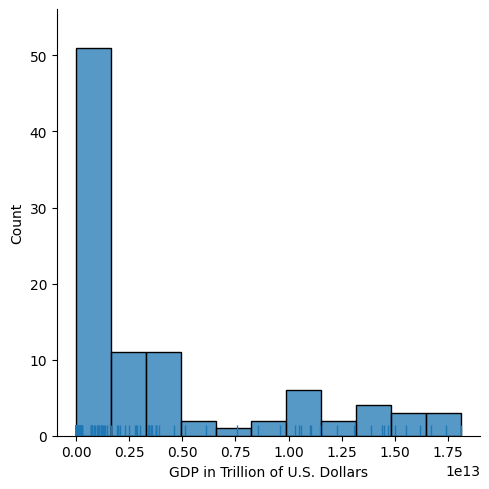

In [42]:
plt.figure(figsize=(10,8))
sns.displot(df.GDP, rug=True, kde=False)
plt.xlabel("GDP in Trillion of U.S. Dollars");

Next is the `LEABY` column. The distribution of `LEABY` in the data is very left skewed where most of the values are on the right-hand side. The is almost the opposite of `GDP` column.

<Figure size 1000x800 with 0 Axes>

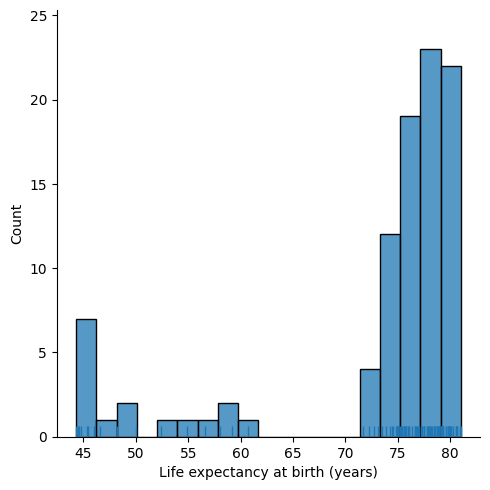

In [13]:
plt.figure(figsize=(10,8))
sns.displot(df.LEABY, rug = True, kde=False)
plt.xlabel("Life expectancy at birth (years)");

Lets get the average `LEABY` and `GDP` and group by `country`

In [15]:
dfMeans = df.drop("Year", axis= 1).groupby("Country").mean().reset_index()
dfMeans

,Country,LEABY,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


Now that we have the averages of `LEABY` and `GDP`, lets plot this using barplots to see the averages for each country.

Text(0.5, 0, 'GDP in Trillions of U.S. Dollars')

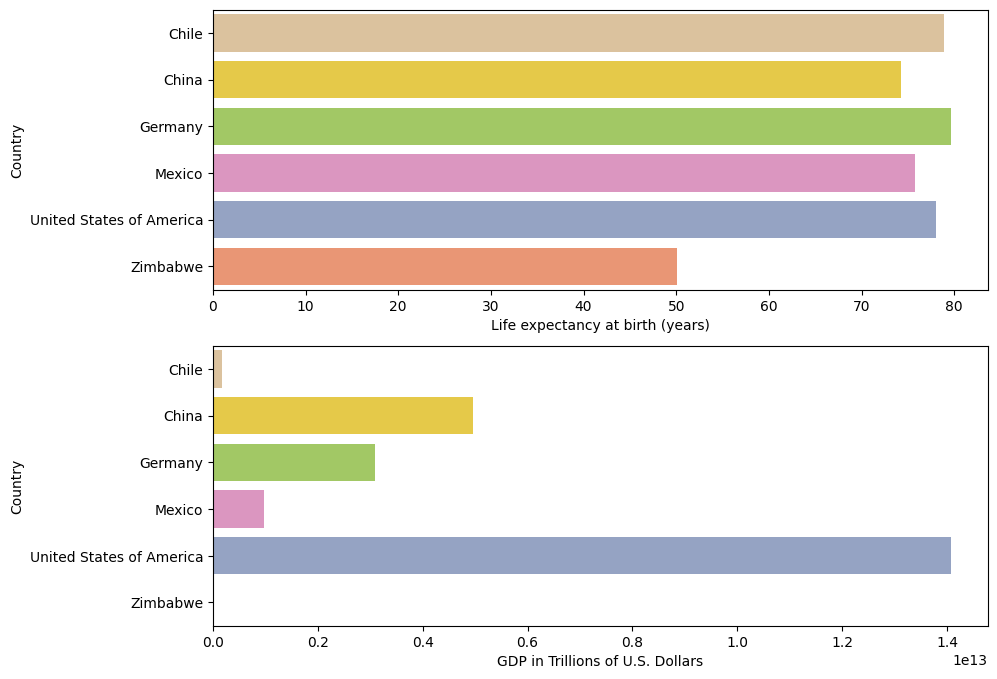

In [40]:
plt.figure(figsize=(10, 8))
ax1 = plt.subplot(2,1,1)
sns.barplot(x="LEABY", y="Country", data=dfMeans, palette='Set2_r')
plt.xlabel("Life expectancy at birth (years)")
plt.subplots_adjust(wspace=0.8)
ax2 = plt.subplot(2,1,2)
sns.barplot(x="GDP", y="Country", data=dfMeans, palette='Set2_r')
plt.subplots_adjust(wspace=0.8)
plt.xlabel("GDP in Trillions of U.S. Dollars")


Zimbabwe has a low life expectancy compared to the rest of the countries. This might explain the skewness of our data.

We can see from `GDP` that Zimbabwe and Chile's GDP is extremely low in comparison to the other countries. USA's GDP is more than double its nearest rival.

#### Violin Plots

We can look for shapes in the data using Violin Plots.

Below, country is on the x-axis and the distribution of the numeric columns: `GDP` and `LEABY` are on the y-axis.

The `GDP` plot on the left shows us that China amd US have relatively large ranges, where the remaining countries have shorter ranges

The `LEABY` plot on the right shows that all countries expect for Zimbabwe has shorter ranges. Zimbabwe range is spanning from the low 30s to the high 60s

Text(0.5, 0, 'Life expectancy at birth (years)')

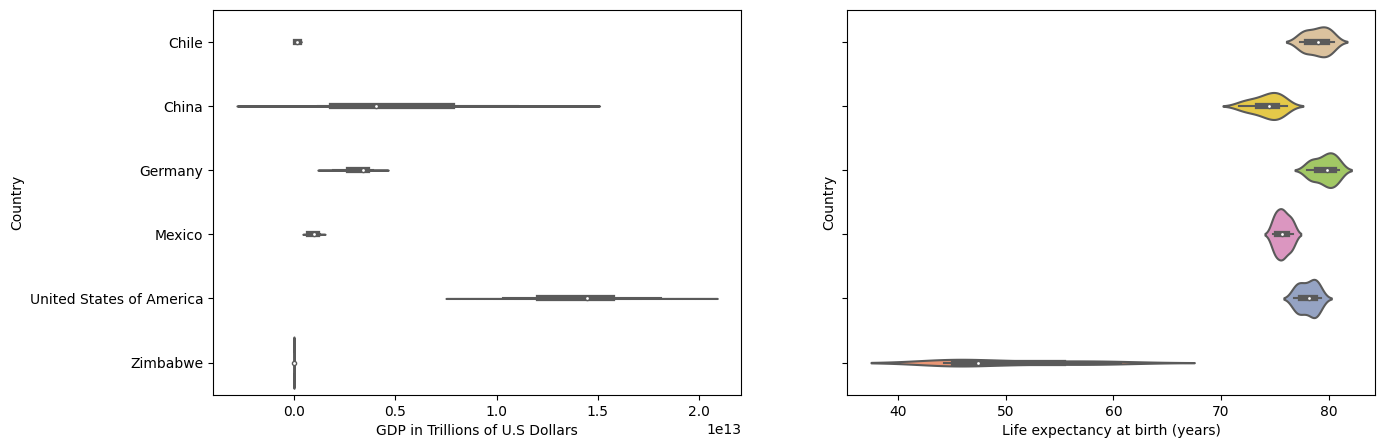

In [47]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(15,5))
ax[0] = sns.violinplot(ax=ax[0], x=df.GDP, y=df.Country, palette='Set2_r')
ax[0].set_xlabel("GDP in Trillions of U.S Dollars")
ax[1] = sns.violinplot(ax=ax[1], x=df.LEABY, y=df.Country, palette='Set2_r')
ax[1].set_xlabel("Life expectancy at birth (years)")

#### Swarm Plots

We can use swarm plots to show the density around the values when overlayed on top of a boxplot or violin plot.

This helps in the `GDP` plot on the left as we can see the data more clearly with Zimbabwe and Chile. This could easily be missed in a standard boxplot or violin plot.

/var/folders/_g/07nd06rn0sb49mqw4hkzrqbc0000gn/T/ipykernel_57481/960255321.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax[0] = sns.swarmplot(ax=ax[0], x=df.GDP, y=df.Country, palette='Set2')
/Library/Python/3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/var/folders/_g/07nd06rn0sb49mqw4hkzrqbc0000gn/T/ipykernel_57481/960255321.py:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax[1] = sns.swarmplot(ax=ax[1], x=df.LEABY, y=df.Country, palette='Set2')
/Library/Python/3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


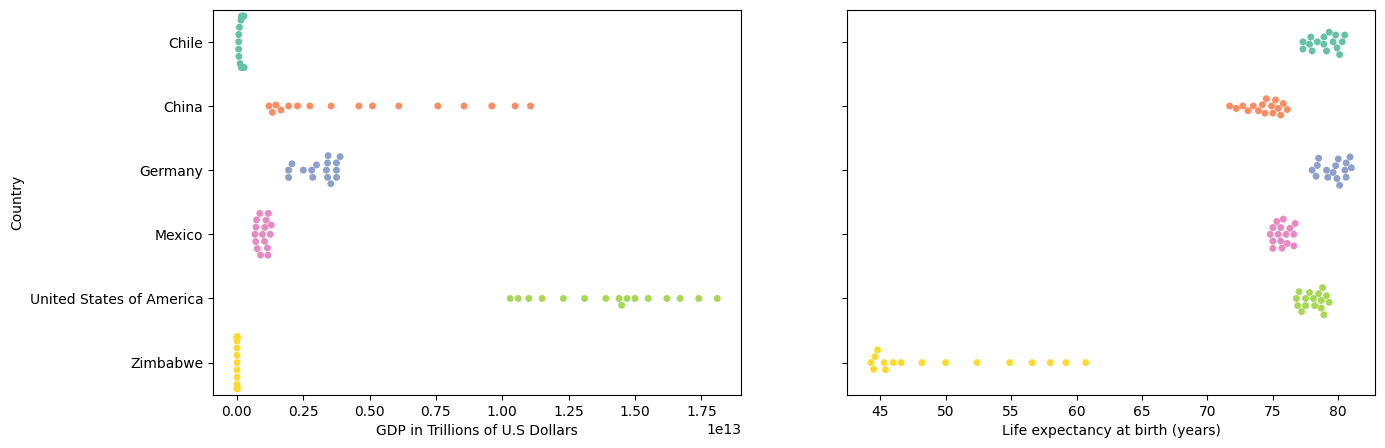

In [57]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(15,5))
ax[0] = sns.swarmplot(ax=ax[0], x=df.GDP, y=df.Country, palette='Set2')
ax[0].set_xlabel("GDP in Trillions of U.S Dollars")
ax[1] = sns.swarmplot(ax=ax[1], x=df.LEABY, y=df.Country, palette='Set2')
ax[1].set_xlabel("Life expectancy at birth (years)");

/var/folders/_g/07nd06rn0sb49mqw4hkzrqbc0000gn/T/ipykernel_57481/1039705014.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax[0] = sns.swarmplot(ax=ax[0], x=df.GDP, y=df.Country, palette = 'Set2')
/Library/Python/3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/var/folders/_g/07nd06rn0sb49mqw4hkzrqbc0000gn/T/ipykernel_57481/1039705014.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax[1] = sns.swarmplot(ax=ax[1], x=df.LEABY, y=df.Country, palette = 'Set2')
/Library/Python/3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


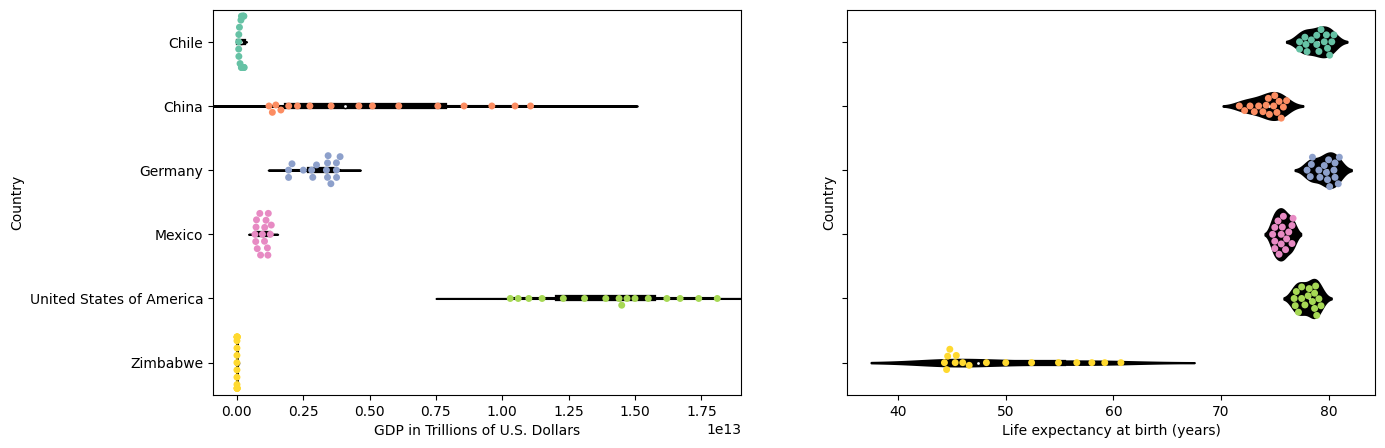

In [58]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
ax[0] = sns.violinplot(ax=ax[0], x=df.GDP, y=df.Country,color = "black")
ax[0] = sns.swarmplot(ax=ax[0], x=df.GDP, y=df.Country, palette = 'Set2')
ax[0].set_xlabel("GDP in Trillions of U.S. Dollars")
ax[1] = sns.violinplot(ax=ax[1], x=df.LEABY, y=df.Country, color = "black")
ax[1] = sns.swarmplot(ax=ax[1], x=df.LEABY, y=df.Country, palette = 'Set2')
ax[1].set_xlabel("Life expectancy at birth (years)");

#### Line Charts

Next, we will explore `GDP` and `LEABY` over the years using line charts.

Below, we can see a summary overview of each country, plus the breakout of each country into there own subplot.

Clearly we can see that the US and Chinas `GDP` have seen substantial gains over the years, particularry between 2000-2015. In comparison the rest of the countries did not see the same increase in magnitude.

Text(0, 0.5, 'GDP in Trillions of U.S Dollars')

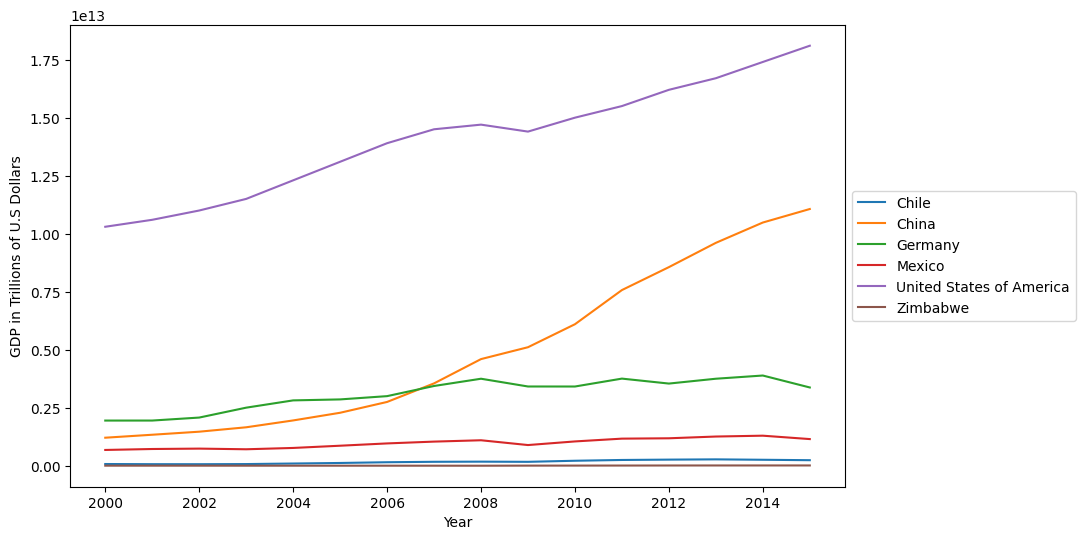

In [62]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP in Trillions of U.S Dollars")

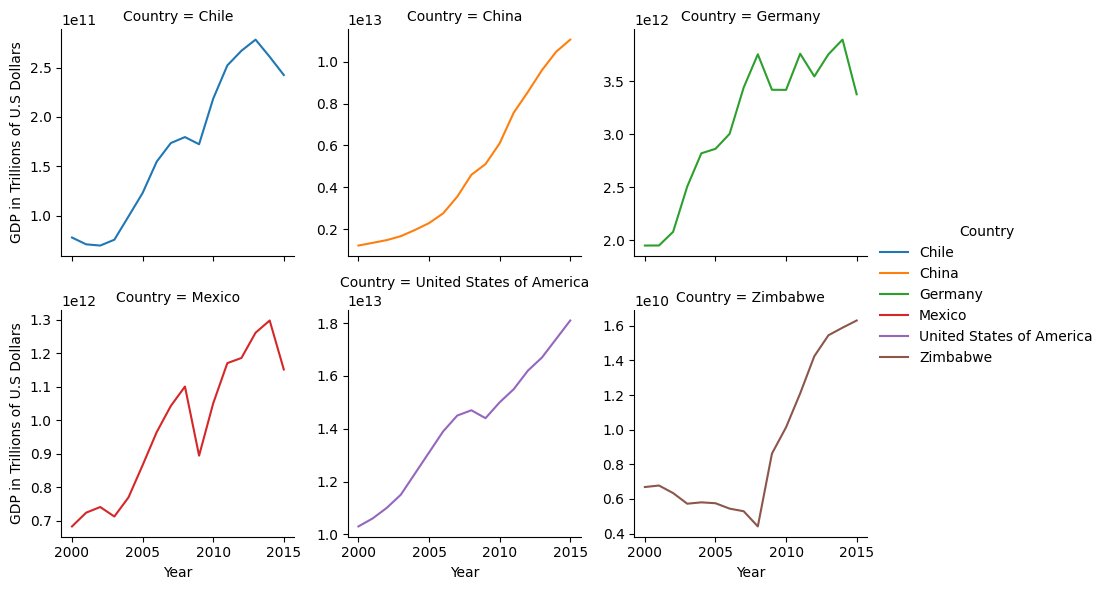

In [63]:
graphGDP = sns.FacetGrid(df, col='Country', col_wrap=3, hue='Country', sharey=False)
graphGDP = (graphGDP.map(sns.lineplot, "Year", "GDP").add_legend().set_axis_labels("Year","GDP in Trillions of U.S Dollars"))
graphGDP

We will do the same with `LEABY` The chart below shows now looks at life expectancy over the years. The chart shows that every country has been increasing their life expectancy, but Zimbabwe has seen the greatest increase after a bit of a dip around 2004.

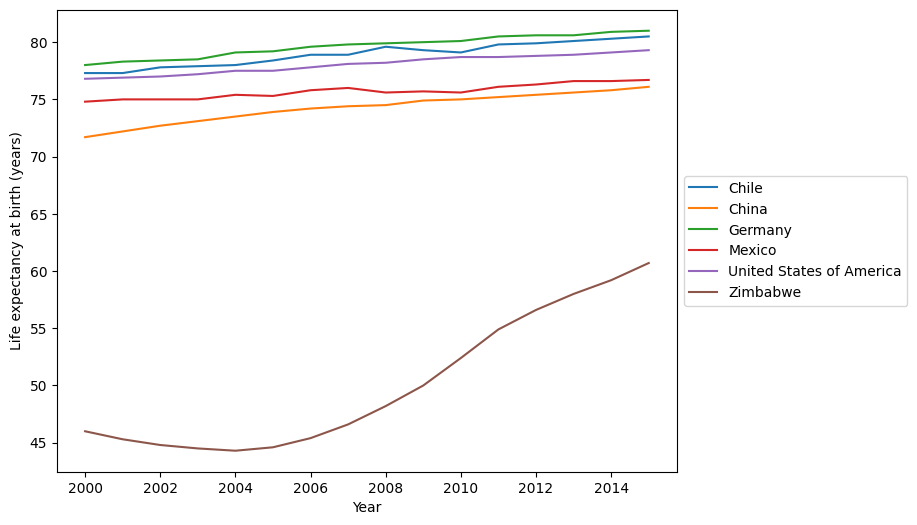

In [64]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.LEABY, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("Life expectancy at birth (years)");


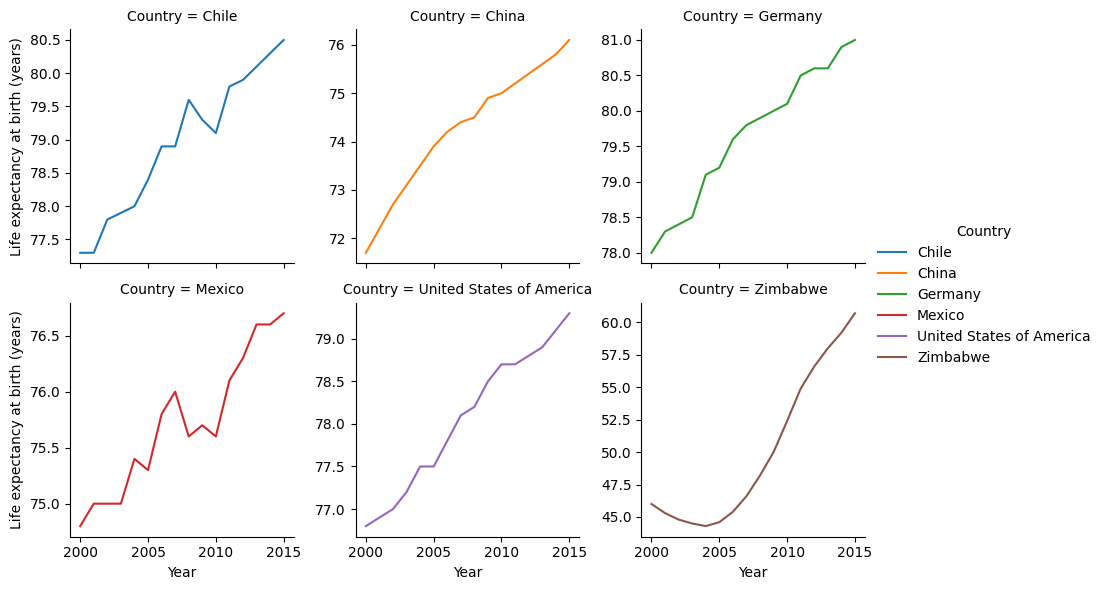

In [65]:
graphLEABY = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphLEABY = (graphLEABY.map(sns.lineplot,"Year","LEABY")
         .add_legend()
         .set_axis_labels("Year","Life expectancy at birth (years)"))

graphLEABY;

#### Scatter Plot

The next two charts will explore the relationship between `GDP` and `LEABY`. In the chart below, it looks like the previous charts where GDP for Zimbabwe is staying flat, while their life expectancy is going up. For the other countries they seem to exhibit a rise in life expectancy as GDP goes up. The US and China seem to have very similar slopes in their relationship between GDP and life expectancy.

<br>

Like the previous plots, countries are broken out into each scatter plot by facets. Looking at the individual countries, most countries like the US, Mexico and Zimbabwe have linear relationships between GDP and life expectancy. China on the other hand has a slightly exponential curve, and Chile's looks a bit logarithmic. In general though one can see an increase in GDP and life expectancy, exhibiting a positive correlation.

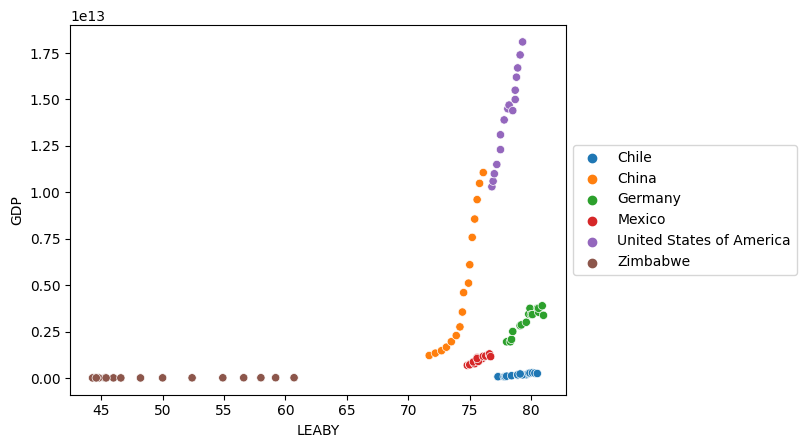

In [67]:
sns.scatterplot(x=df.LEABY, y=df.GDP, hue=df.Country).legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

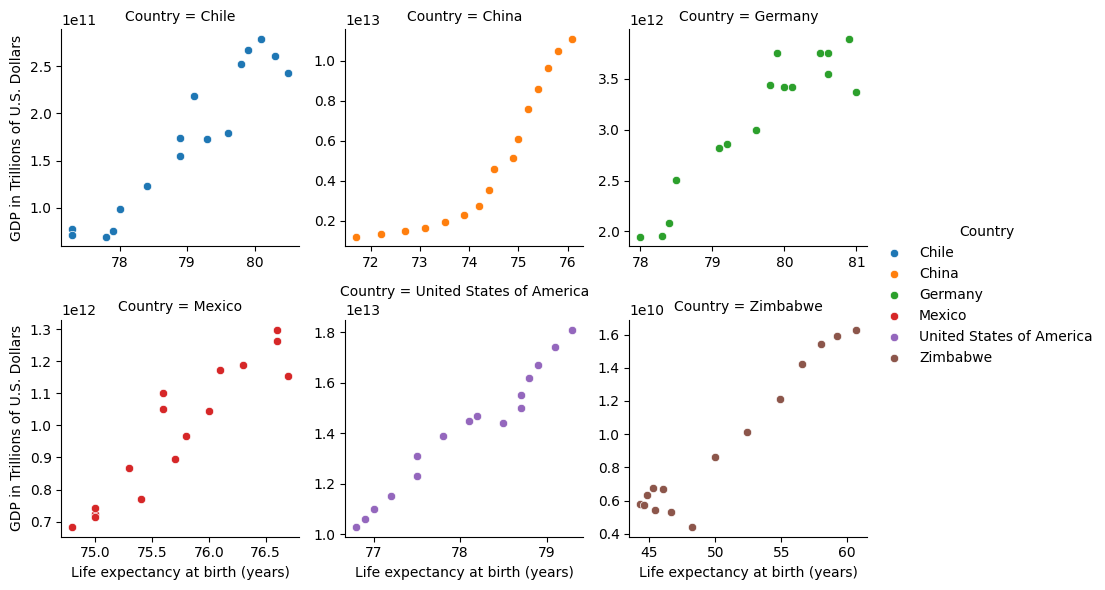

In [68]:
graph = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"LEABY", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));

## Conclusions

Even though we only had 96 rows of data, this project was able to make quite a few data visualizations of the data.

The project also allowed the original questions to be answered:

- Has life expectancy increased over time in the six nations?
    - Yes with Zimbabwe having the greatest increase.
- Has GDP increased over time in the six nations?
    - GDP has also increased for all countries in our list, especially for China.
- Is there a correlation between GDP and life expectancy of a country?
    - Yes there is a positive correlation between GDP and life expectancy for countries in our list.
- What is the average life expectancy in these nations?
    - Average life expectancy was between mid to high 70s for the countries except for Zimbabwe which was 50.
- What is the distribution of that life expectancy?
    - the life expectancy had a left skew, or most of the observations were on the right side.
